## Felügyelet nélküli telepítő (iso) készítése:

In [ ]:
%%sh
cd ~
#rm -f -R ~/ubuntu-iso
pwd
git clone https://github.com/englert/ubuntu-iso.git
cd ~/ubuntu-iso
gnome-terminal -e "sudo ./create-unattended-iso.sh"


## Ubuntu szerver telepítése Virtualboxon:

In [ ]:
%%sh
VM="ubu"
RAM="2048"
VRAM="16"
HDD="8192"
LAN="enp3s0"
ISO="ubuntuserver.iso"
VMs="VirtualBox VMs"
cd ~
VBoxManage createvm --name $VM --ostype "Linux_64" --register
VBoxManage modifyvm $VM --nic1 bridged --bridgeadapter1 $LAN
VBoxManage createhd --filename "$VMs/$VM/$VM.vdi" --size $HDD
VBoxManage storagectl $VM --name "SATA Controller" --add sata
VBoxManage storageattach $VM --storagectl "SATA Controller" --port 0 --device 0 --type hdd --medium "$VMs/$VM/$VM.vdi"
VBoxManage storagectl $VM --name "IDE Controller" --add ide
VBoxManage storageattach $VM --storagectl "IDE Controller" --port 0 --device 0 --type dvddrive --medium $ISO
VBoxManage modifyvm $VM --ioapic on
VBoxManage modifyvm $VM --boot1 dvd --boot2 disk --boot3 none --boot4 none
VBoxManage modifyvm $VM --memory $RAM --vram $VRAM

In [ ]:
%%sh
VM="ubu"
VBoxManage startvm $VM --type headless

In [ ]:
import subprocess

In [ ]:
subprocess.call(['df', '-h'])

In [ ]:
subprocess.call('du -hs $HOME', shell=True)

In [ ]:
# Import the module
import subprocess

# Ask the user for input
host = input("Enter a host to ping: ")	

# Set up the echo command and direct the output to a pipe
p1 = subprocess.Popen(['ping', '-c 2', host], stdout=subprocess.PIPE)

# Run the command
output = p1.communicate()[0]

print( output )

In [ ]:
import subprocess

p = subprocess.Popen(["echo", "hello world"], stdout=subprocess.PIPE)

print( p.communicate() )



In [ ]:
txt = '''
#!/bin/bash
#
# Translate a MAC address fetched from VirtualBox into a IP address
#

if [  $# -lt 1 ]; then 
  echo -e "\nUsage:\n$0 [virtual machine] \n" 
  exit 1
fi

# Get a string of the form macaddress1=xxxxxxxxxxx
var1=$(VBoxManage showvminfo $1 --machinereadable |grep macaddress1)

# Asdign macaddress1 the MAC address as a value
eval $var1

# assign m the MAC address in lower case
m=$(echo ${macaddress1}|tr '[A-Z]' '[a-z]')

# This is the MAC address formatted with : and 0n translated into n
mymac=$(echo `expr ${m:0:2}`:`expr ${m:2:2}`:`expr ${m:4:2}`:`expr ${m:6:2}`:`expr ${m:8:2}`:`expr ${m:10:2}`)
echo "The MAC address of the virtual machine $1 is $mymac"

# Get known IP and MAC addresses
IFS=$'\n'; for line in $(arp -a); do 
#  echo $line
  IFS=' ' read -a array <<< $line
  ip=$(echo "${array[1]}"|tr "(" " "|tr ")" " ")

  if [ "$mymac" = "${array[3]}" ]; then
    echo "and the IP address is $ip"
  fi

done

'''

with open('malac.sh','w') as f:
    f.write(txt)

In [ ]:
%%bash
chmod +x malac.sh
./malac.sh ubu

In [ ]:
! ls


In [1]:
import numpy as np
from IPython.display import Audio
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t**2)
Audio(data,rate=framerate)

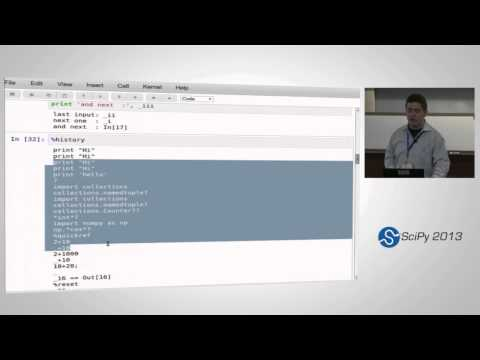

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('xe_ATRmw0KM')

In [3]:
%timeit np.linalg.eigvals(np.random.rand(100,100))

13.3 ms ± 497 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%bash
echo "HELLO WORLD!"

HELLO WORLD!


In [10]:
%%file zenofpython.py
'''this is a brand new file'''
import this 


Overwriting zenofpython.py


In [ ]:
from IPython.display import Image
Image(filename='ca_website.png',width=800,height=700)

Populating the interactive namespace from numpy and matplotlib


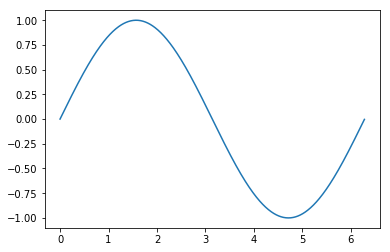

In [16]:
%pylab inline 
#(import numpy as np and matplotlib)
plt.xkcd()
x = np.arange(0,2*np.pi,.01)
plt.plot(x,np.sin(x))

In [29]:
import numpy as np
from IPython.display import Audio
framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t**2)
Audio(data,rate=framerate)

In [22]:
data

array([ 0.00000000e+00,  7.10770361e-07,  2.84308144e-06, ...,
       -5.86632002e-01, -3.08340079e-01,  2.37613246e-12])

In [30]:
from IPython.display import HTML
s = """<marquee>DFW Pythoneers!!!</marquee>"""
h = HTML(s); h

In [31]:
%%HTML
<button type="button" id="loading-example-btn" data-loading-text="Loading..." class="btn btn-primary">
  Loading state
</button>

In [34]:
from IPython.display import HTML
HTML('<iframe src=http://fiddle.jshell.net/bokeh/K8P4P/show/ width=600 height=700></iframe>')

In [38]:
%%bash
for i in 1 2 3 4;
do
     echo $i
done

1
2
3
4


Here’s how to format Markdown cells in Jupyter notebooks in the IBM Data Science Experience.

Headings: Use #s followed by a blank space for notebook titles and section headings:
 # title 
 ## major headings 
 ### subheadings 
 #### 4th level subheadings

Emphasis: Use this code: Bold: __string__ or **string** Italic: _string_ or *string*

Mathematical symbols: Use this code: $ mathematical symbols $

Monospace font: Surround text with a back single quotation mark. (`) Use monospace for file path and file names and for text users enter or message text users see.

Line breaks: Sometimes markdown doesn’t make line breaks when you want them. Use this code for a manual line break: <br>.

Colors: Use this code: <font color=blue|red|green|pink|yellow>Text</font> Not all markdown code works within a font tag, so review your colored text carefully!

Indenting: Use a greater than sign (>) and then a space, then type the text. Everything is indented until the next carriage return.

Bullets: Use the dash sign (- ) with two spaces after it or a space, a dash, and a space ( - ), to create a circular bullet. To create a sub bullet, use a tab followed a dash and two spaces. You can also use an asterisk instead of a dash, and it works the same.

Numbered lists: Start with 1. followed by a space, then it starts numbering for you. Start each line with some number and a period, then a space. Tab to indent to get subnumbering.

Colored note boxes: Use one of these div tags. Not all markdown code works within a div tag, so review your colored boxes carefully!
 <div class="alert alert-block alert-info">Tip: Use blue boxes for Tips and notes. If it’s a note, you don’t have to include the word “Note”.</div>
 <div class="alert alert-block alert-warning">Example: Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed.</div>
 <div class="alert alert-block alert-success">Up to you: Use green boxes sparingly, and only for some specific purpose that the other boxes can't cover. For example, if you have a lot of related content to link to, maybe you decide to use green boxes for related links from each section of a notebook. </div>
 <div class="alert alert-block alert-danger">Just don't: In general, just avoid the red boxes.</div>

Graphics: You can attach image files directly to a notebook only in Markdown cells. Drag and drop your images to the Mardown cell to attach it to the notebook. To add images to other cell types, you can use only graphics that are hosted on the web. You can’t add captions for graphics at this time. Use this code: <img src="url.gif" alt="Alt text that describes the graphic" title="Title text" />

Geometric shapes: Use this code with a decimal or hex reference number from here: UTF-8 Geometric shapes
 &#reference_number

Horizontal lines: Use three asterisks: ***

Internal links: To link to a section, use this code: [section title](#section-title) For the text in the parentheses, replace spaces and special characters with a hyphen. Make sure to test all the links!

Alternatively, you can add an ID for a section right above the section title. Use this code: <a id="section_ID"></a> Make sure that the section_ID is unique within the notebook.

Use this code for the link and make sure to test all the links! [section title](#section_ID)

External links: Use this code and test all links! __[link text](http://url)__